Stres düzeyindeki artış somatic belirtileri yani bedensel tepkileri ne düzeyde etkiliyor? Kontrol mekanizması stresin yarattığı etkiyi tamponluyor mu? 

somatic_congeneric = ß0 
                     + ß1 * stress_congeneric_score
                     + ß2 * control_congeneric_score
                     + ß3 * (stress_congeneric_score + control_congeneric_score)
                     + ε

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
df = pd.read_csv("final_learning_potential_dataset.csv")
print("veri boyutu", df.shape)
df.head()

veri boyutu (427, 7)


,stress_congeneric_score,control_congeneric,self_efficacy_congeneric,depression_congeneric_score,somatic_congeneric,cog_affect_congeneric,learning_potential_score
0,-0.994499,0.568381,1.568341,-0.852725,-1.522905,-0.294627,2.153331
1,-1.601830,1.258011,1.846971,-1.430514,-1.403349,-1.390766,3.369578
2,0.183967,-0.516081,0.397377,-0.347319,0.019725,-0.594503,0.234547
3,0.419527,-0.581236,-0.063644,-0.825759,-1.003940,-0.594503,0.534051
4,-1.093718,1.413048,0.214986,0.870991,1.372580,0.501635,-0.020603


In [ ]:
#kontrol
print("eksik değer var mı")
print(df.isnull().sum())

print("\nSütun tipleri")
print(df.dtypes)

df.describe()

eksik değer var mı
stress_congeneric_score        0
control_congeneric             0
self_efficacy_congeneric       0
depression_congeneric_score    0
somatic_congeneric             0
cog_affect_congeneric          0
learning_potential_score       0
stress_x_control               0
dtype: int64

Sütun tipleri
stress_congeneric_score        float64
control_congeneric             float64
self_efficacy_congeneric       float64
depression_congeneric_score    float64
somatic_congeneric             float64
cog_affect_congeneric          float64
learning_potential_score       float64
stress_x_control               float64
dtype: object


,stress_congeneric_score,control_congeneric,self_efficacy_congeneric,depression_congeneric_score,somatic_congeneric,cog_affect_congeneric,learning_potential_score,stress_x_control
count,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,4.270000e+02,427.000000
mean,-2.912060e-17,-2.142444e-16,-1.580833e-16,-7.488155e-17,1.393629e-16,-1.102423e-16,3.328069e-17,-1.102381
std,1.064596e+00,1.083818e+00,1.117467e+00,1.047947e+00,1.089345e+00,1.069343e+00,2.158006e+00,1.371555
min,-2.927820e+00,-2.607206e+00,-2.962832e+00,-1.555493e+00,-1.667474e+00,-1.390766e+00,-5.947306e+00,-7.948070
25%,-7.919530e-01,-7.831843e-01,-7.735861e-01,-8.820801e-01,-9.758037e-01,-8.192315e-01,-1.495320e+00,-1.581061
50%,8.818481e-02,-5.321891e-02,-6.364408e-02,-1.237289e-01,-1.136605e-01,-2.946273e-01,-1.874215e-02,-0.590392
75%,7.802858e-01,7.818293e-01,8.027065e-01,7.946947e-01,7.403212e-01,7.707286e-01,1.748461e+00,-0.161470
max,2.939673e+00,2.714671e+00,2.835543e+00,2.490360e+00,2.334538e+00,2.392311e+00,4.279605e+00,0.276330


In [ ]:
#feature seçimi ve interaction oluşturma
target_col = "somatic_congeneric"
stress_col = "stress_congeneric_score"
control_col = "control_congeneric"

df["stress_x_control"] = df[stress_col] * df[control_col]
interaction_col = "stress_x_control"

feature_cols = [stress_col, control_col, interaction_col]

print("kullanılacak feature'lar:", feature_cols)
print("target:", target_col) 

df[feature_cols + [target_col]].head()

kullanılacak feature'lar: ['stress_congeneric_score', 'control_congeneric', 'stress_x_control']
target: somatic_congeneric


,stress_congeneric_score,control_congeneric,stress_x_control,somatic_congeneric
0,-0.994499,0.568381,-0.565254,-1.522905
1,-1.601830,1.258011,-2.015120,-1.403349
2,0.183967,-0.516081,-0.094942,0.019725
3,0.419527,-0.581236,-0.243844,-1.003940
4,-1.093718,1.413048,-1.545476,1.372580


In [7]:
# feature target matrisi ve test split 

X = df[feature_cols].copy()
y = df[target_col].copy()

print("X", X.shape)
print("y", y.shape)

X (427, 3)
y (427,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.20)
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (341, 3)
X_test (86, 3)


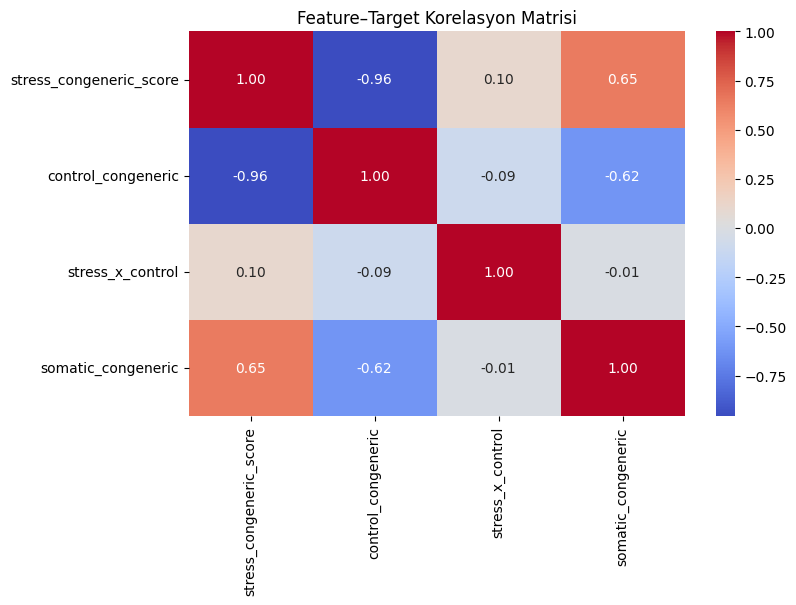

In [11]:
corr = df[feature_cols + [target_col]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature–Target Korelasyon Matrisi")
plt.show()

In [18]:
# basit linear regression

model = LinearRegression()
model.fit(X_train[[stress_col, control_col]], y_train)

y_pred_train = model.predict(X_train[[stress_col, control_col]])
y_pred_test = model.predict(X_test[[stress_col, control_col]])

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return{
        "r2": r2_score(y_true, y_pred),
        "mae": mean_absolute_error(y_true, y_pred),
        "rmse": rmse
    }

train_metrics = regression_metrics(y_train, y_pred_train)
test_metrics  = regression_metrics(y_test, y_pred_test)

print("TRAIN METRICS:", train_metrics)
print("TEST METRICS:", test_metrics)


coef_table = pd.DataFrame({
    "Feature": [stress_col, control_col],
    "Coefficient": model.coef_
})
coef_table

TRAIN METRICS: {'r2': 0.40304630971846866, 'mae': 0.688027296565406, 'rmse': np.float64(0.8444486789136535)}
TEST METRICS: {'r2': 0.48535007028063026, 'mae': 0.5729726926643975, 'rmse': np.float64(0.7642371673557952)}


,Feature,Coefficient
0,stress_congeneric_score,0.646854
1,control_congeneric,-0.016035


Basit doğrusal regresyon modeli (somatic ~ stress + control) somatik belirtilerin yaklaşık %48’ini açıklamaktadır (R²_test ≈ .49). Stres değişkeni güçlü ve pozitif bir yordayıcı (β ≈ .65) iken, kontrol algısı tek başına oldukça zayıf bir etki göstermiştir (β ≈ –.02). Bu bulgu kontrol algısının somatik belirtilerle ilişkisinin doğrudan değil, muhtemelen stres düzeyiyle olan etkileşim üzerinden ortaya çıkacağını düşündürmektedir.